In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Baseline

In [2]:
file_names = ['simple_1_responses', 'simple_2_responses', 'simple_3_responses', 'simple_4_responses', 'simple_5_responses', 'simple_6_responses']
log_names = ['simple_1_logs', 'simple_2_logs', 'simple_3_logs', 'simple_4_logs', 'simple_5_logs', 'simple_6_logs']

In [3]:
directory_path = 'llama_outputs'

pred = {}
total_duration = {}
load_duration = {}
prompt_eval_count = {}
prompt_eval_duration = {}
prompt_eval_rate = {}
eval_count = {}
eval_duration = {}
eval_rate = {}

for filename in os.listdir(directory_path):
    if filename.endswith('responses.txt'):
        segment = 0
        file_path = os.path.join(directory_path, filename)
        results = []
        with open(file_path, 'r') as file:
            for line in file:
                if line[:6] == 'ANSWER':
                    results.append(line[8:len(line) - 1])
                elif line[:8] == '**ANSWER':
                    results.append(line[10:len(line) - 3])
                elif line[:4] == '----':
                    segment += 1
                    if segment > len(results):
                        results.append('')
        pred[filename[:-4]] = results
    if filename.endswith('logs.txt'):
        file_path = os.path.join(directory_path, filename)
        idx = 0
        td = []
        ld = []
        pec = []
        ped = []
        per = []
        ec = []
        ed = []
        er = []
        with open(file_path, 'r', encoding="utf-8") as file:
            for line in file:
                idx += 1
                if idx % 10 == 2:
                    line = line[-18:].strip()
                    td.append(line)
                elif idx % 10 == 3:
                    line = line[-17:].strip()
                    ld.append(line)
                elif idx % 10 == 4:
                    line = line[-15:].strip()
                    pec.append(line)
                elif idx % 10 == 5:
                    line = line[-8:].strip()
                    ped.append(line)
                elif idx % 10 == 6:
                    line = line[-15:].strip()
                    per.append(line)
                elif idx % 10 == 7:
                    line = line[-15:].strip()
                    ec.append(line)
                elif idx % 10 == 8:
                    line = line[-10:].strip()
                    ed.append(line)
                elif idx % 10 == 9:
                    line = line[-15:].strip()
                    er.append(line)
        total_duration[filename[:-4]] = td
        load_duration[filename[:-4]] = ld
        prompt_eval_count[filename[:-4]] = pec
        prompt_eval_duration[filename[:-4]] = ped
        prompt_eval_rate[filename[:-4]] = per
        eval_count[filename[:-4]] = ec
        eval_duration[filename[:-4]] = ed
        eval_rate[filename[:-4]] = er

### Accuracy

In [4]:
print(len(pred['simple_1_responses']))
pred['simple_1_responses']

19


['SITTING',
 'WALKING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING']

In [5]:
# Record responses that are not correctly formatted
pred['simple_2_responses'][7] = 'SITTING'
pred['simple_2_responses'][17] = 'WALKING'
pred['simple_2_responses']

['SITTING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING']

In [6]:
# Record responses that are not correctly formatted
pred['simple_3_responses'][1] = 'WALKING'
pred['simple_3_responses'][7] = 'SITTING'
pred['simple_3_responses']

['SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING']

In [7]:
# Record responses that are not correctly formatted
pred['simple_4_responses'][4] = 'WALKING'
pred['simple_4_responses'][5] = 'SITTING'
pred['simple_4_responses'][14] = 'WALKING'
pred['simple_4_responses']

['WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING']

In [8]:
# Record responses that are not correctly formatted
pred['simple_5_responses'][3] = 'WALKING'
pred['simple_5_responses'][6] = 'SITTING'
pred['simple_5_responses']

['WALKING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'SITTING']

In [9]:
# Record responses that are not correctly formatted
pred['simple_6_responses'][16] = 'WALKING'
pred['simple_6_responses']

['SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'WALKING',
 'WALKING.',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING']

In [10]:
acc = []
for file in file_names:
    temp = 0
    for i in range(19):
        if i <= 9 and pred[file][i] == 'SITTING':
            temp += 1
        if i > 9 and pred[file][i] == 'WALKING':
            temp += 1
    acc.append(temp/19)
acc

[0.42105263157894735,
 0.5789473684210527,
 0.47368421052631576,
 0.6842105263157895,
 0.3684210526315789,
 0.42105263157894735]

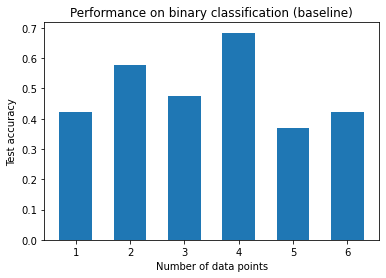

In [11]:
plt.bar(range(1, 7), acc, width=0.6)
plt.xlabel('Number of data points')
plt.ylabel('Test accuracy')
plt.title('Performance on binary classification (baseline)')
plt.show()

### Log data

In [12]:
td_mean = []
for file in log_names:
    td_temp = []
    for td in total_duration[file]:
        if 'm' in td:
            minute, second = td[:-1].split('m')
            td_temp.append(int(minute) * 60 + float(second))
        else:
            td_temp.append(float(td[:-1]))
    td_mean.append((sum(td_temp) - max(td_temp) - min(td_temp)) / 17)
td_mean

[79.52489798441175,
 99.37279675735292,
 100.58393603388237,
 122.08480862070589,
 122.34246763111766,
 103.81702041076471]

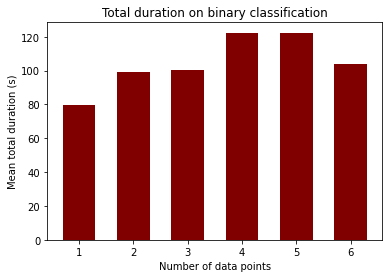

In [13]:
plt.bar(range(1, 7), td_mean, width=0.6, color='maroon')
plt.xlabel('Number of data points')
plt.ylabel('Mean total duration (s)')
plt.title('Total duration on binary classification')
plt.show()

In [14]:
load_duration

{'simple_1_logs': ['3.903153124s',
  '97.740833ms',
  '98.302864ms',
  '38.761146ms',
  '113.512656ms',
  '42.633802ms',
  '60.936354ms',
  '105.420469ms',
  '63.925833ms',
  '47.435ms',
  '54.705261ms',
  '55.355833ms',
  '38.026562ms',
  '68.068646ms',
  '47.227761ms',
  '44.921875ms',
  '78.635729ms',
  '68.631562ms',
  '71.280937ms'],
 'simple_2_logs': ['62.891875ms',
  '70.252396ms',
  '77.875885ms',
  '67.152812ms',
  '51.97151ms',
  '43.025886ms',
  '77.515208ms',
  '72.046719ms',
  '85.059583ms',
  '41.0975ms',
  '58.091354ms',
  '51.65026ms',
  '82.438073ms',
  '42.38875ms',
  '64.485364ms',
  '42.153698ms',
  '119.239792ms',
  '119.239792ms',
  '28.524687ms'],
 'simple_3_logs': ['51.162917ms',
  '37.932031ms',
  '66.662135ms',
  '34.720157ms',
  '72.412032ms',
  '78.033073ms',
  '37.395885ms',
  '55.772031ms',
  '89.156198ms',
  '47.231042ms',
  '47.45849ms',
  '52.925573ms',
  '90.727708ms',
  '41.88901ms',
  '58.566146ms',
  '80.62151ms',
  '85.436146ms',
  '86.802292ms',
 

In [15]:
ld_mean = []
for file in log_names:
    ld_temp = []
    for ld in load_duration[file]:
        ld_temp.append(float(ld[:-2]))
    ld_mean.append((sum(ld_temp) - max(ld_temp) - min(ld_temp)) / 17)
ld_mean

[63.647674529411745,
 65.25509794117647,
 60.90032170588236,
 62.202555176470604,
 66.85276341176471,
 68.11601094117647]

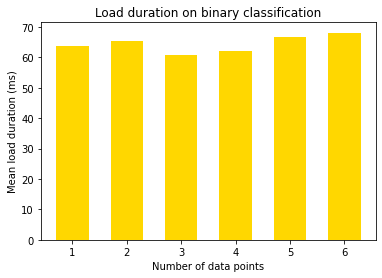

In [16]:
plt.bar(range(1, 7), ld_mean, width=0.6, color='gold')
plt.xlabel('Number of data points')
plt.ylabel('Mean load duration (ms)')
plt.title('Load duration on binary classification')
plt.show()

In [17]:
pec_mean = []
for file in log_names:
    pec_temp = []
    for pec in prompt_eval_count[file]:
        pec_temp.append(float(pec[:4]))
    pec_mean.append((sum(pec_temp) - max(pec_temp) - min(pec_temp)) / 17)
pec_mean

[241.76470588235293,
 292.4117647058824,
 327.6470588235294,
 367.94117647058823,
 398.3529411764706,
 433.7647058823529]

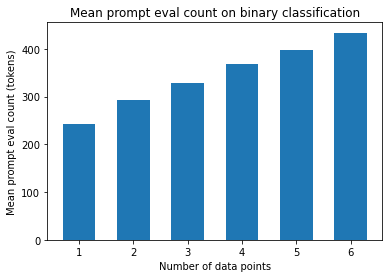

In [18]:
plt.bar(range(1, 7), pec_mean, width=0.6)
plt.xlabel('Number of data points')
plt.ylabel('Mean prompt eval count (tokens)')
plt.title('Mean prompt eval count on binary classification')
plt.show()

In [19]:
ped_mean = []
for file in log_names:
    ped_temp = []
    for ped in prompt_eval_duration[file]:
        ped_temp.append(float(ped[:-1]))
    ped_mean.append((sum(ped_temp) - max(ped_temp) - min(ped_temp)) / 17)
ped_mean

[14.156529411764701,
 18.790352941176476,
 22.27929411764706,
 29.377117647058828,
 31.8760588235294,
 32.075823529411764]

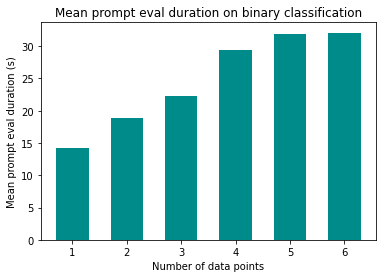

In [20]:
plt.bar(range(1, 7), ped_mean, width=0.6, color='darkcyan')
plt.xlabel('Number of data points')
plt.ylabel('Mean prompt eval duration (s)')
plt.title('Mean prompt eval duration on binary classification')
plt.show()

In [21]:
per_mean = []
for file in log_names:
    per_temp = []
    for per in prompt_eval_rate[file]:
        per_temp.append(float(per[:5]))
    per_mean.append((sum(per_temp) - max(per_temp) - min(per_temp)) / 17)
per_mean

[17.14470588235294,
 15.664117647058822,
 14.755294117647061,
 12.581764705882351,
 12.532941176470588,
 13.597647058823533]

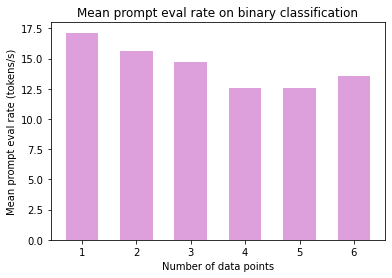

In [22]:
plt.bar(range(1, 7), per_mean, width=0.6, color='plum')
plt.xlabel('Number of data points')
plt.ylabel('Mean prompt eval rate (tokens/s)')
plt.title('Mean prompt eval rate on binary classification')
plt.show()

In [23]:
ec_mean = []
for file in log_names:
    ec_temp = []
    for ec in eval_count[file]:
        ec_temp.append(float(ec[:4]))
    ec_mean.append((sum(ec_temp) - max(ec_temp) - min(ec_temp)) / 17)
ec_mean

[275.2352941176471,
 366.5882352941176,
 349.8235294117647,
 393.11764705882354,
 390.11764705882354,
 342.05882352941177]

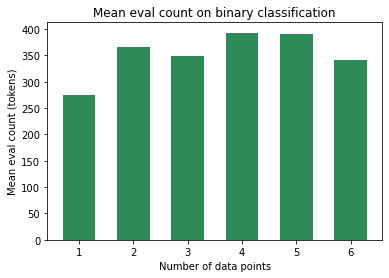

In [24]:
plt.bar(range(1, 7), ec_mean, width=0.6, color='seagreen')
plt.xlabel('Number of data points')
plt.ylabel('Mean eval count (tokens)')
plt.title('Mean eval count on binary classification')
plt.show()

In [25]:
ed_mean = []
for file in log_names:
    ed_temp = []
    for ed in eval_duration[file]:
        if 'm' in ed:
            minute, second = ed[:-1].split('m')
            ed_temp.append(int(minute) * 60 + float(second))
        else:
            ed_temp.append(float(ed[:-1]))
    ed_mean.append((sum(ed_temp) - max(ed_temp) - min(ed_temp)) / 17)
ed_mean

[64.18070588235294,
 79.82876470588235,
 77.99388235294118,
 92.32211764705883,
 90.22317647058824,
 71.19005882352941]

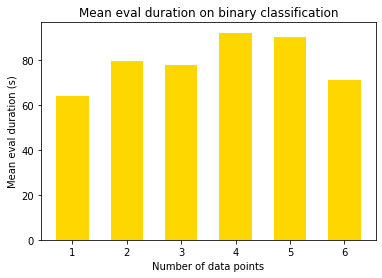

In [26]:
plt.bar(range(1, 7), ed_mean, width=0.6, color='gold')
plt.xlabel('Number of data points')
plt.ylabel('Mean eval duration (s)')
plt.title('Mean eval duration on binary classification')
plt.show()

In [27]:
er_mean = [x / y for x, y in zip(ec_mean, ed_mean)]
er_mean

[4.288442925856406,
 4.592182237126673,
 4.485268829531124,
 4.258109075895394,
 4.323918335839102,
 4.8048678310173845]

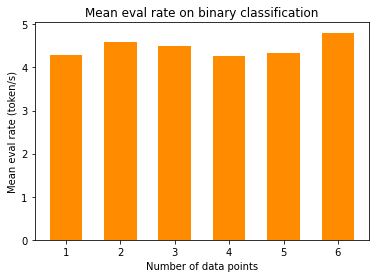

In [28]:
plt.bar(range(1, 7), er_mean, width=0.6, color='darkorange')
plt.xlabel('Number of data points')
plt.ylabel('Mean eval rate (token/s)')
plt.title('Mean eval rate on binary classification')
plt.show()

## Prompt configuration with background knowledge

### Accuracy

In [63]:
directory_path = 'llama_outputs_2'

pred = {}
total_duration = {}
load_duration = {}
prompt_eval_count = {}
prompt_eval_duration = {}
prompt_eval_rate = {}
eval_count = {}
eval_duration = {}
eval_rate = {}

for filename in os.listdir(directory_path):
    if 'responses' in filename:
        segment = 0
        file_path = os.path.join(directory_path, filename)
        results = []
        with open(file_path, 'r') as file:
            for line in file:
                if line[:6] == 'ANSWER':
                    results.append(line[8:len(line) - 1])
                elif line[:8] == '**ANSWER':
                    results.append(line[10:len(line) - 3])
                elif line[:4] == '----':
                    segment += 1
                    if segment > len(results):
                        results.append('')
        pred[filename[:-4]] = results
    if 'logs' in filename:
        file_path = os.path.join(directory_path, filename)
        idx = 0
        td = []
        ld = []
        pec = []
        ped = []
        per = []
        ec = []
        ed = []
        er = []
        with open(file_path, 'r', encoding="utf-8") as file:
            for line in file:
                idx += 1
                if idx % 10 == 2:
                    line = line[-18:].strip()
                    td.append(line)
                elif idx % 10 == 3:
                    line = line[-17:].strip()
                    ld.append(line)
                elif idx % 10 == 4:
                    line = line[-15:].strip()
                    pec.append(line)
                elif idx % 10 == 5:
                    line = line[-10:].strip()
                    ped.append(line)
                elif idx % 10 == 6:
                    line = line[-15:].strip()
                    per.append(line)
                elif idx % 10 == 7:
                    line = line[-15:].strip()
                    ec.append(line)
                elif idx % 10 == 8:
                    line = line[-10:].strip()
                    ed.append(line)
                elif idx % 10 == 9:
                    line = line[-15:].strip()
                    er.append(line)
        total_duration[filename[:-4]] = td
        load_duration[filename[:-4]] = ld
        prompt_eval_count[filename[:-4]] = pec
        prompt_eval_duration[filename[:-4]] = ped
        prompt_eval_rate[filename[:-4]] = per
        eval_count[filename[:-4]] = ec
        eval_duration[filename[:-4]] = ed
        eval_rate[filename[:-4]] = er

In [64]:
print(len(pred['simple_1_responses_prompt']))
pred['simple_1_responses_prompt']

19


['SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING']

In [65]:
# Record responses that are not correctly formatted
pred['simple_2_responses_prompt'][12] = 'SITTING'
pred['simple_2_responses_prompt'][18] = 'WALKING'
pred['simple_2_responses_prompt']

['WALKING',
 'SITTING',
 'WALKING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING']

In [66]:
# Record responses that are not correctly formatted
pred['simple_3_responses_prompt'][10] = 'WALKING'
pred['simple_3_responses_prompt']

['SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING']

In [67]:
# Record responses that are not correctly formatted
pred['simple_4_responses_prompt'][9] = 'SITTING'
pred['simple_4_responses_prompt'][15] = 'WALKING'
pred['simple_4_responses_prompt'][16] = 'WALKING'
pred['simple_4_responses_prompt'][17] = 'WALKING'
pred['simple_4_responses_prompt']

['SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING']

In [68]:
# Record responses that are not correctly formatted
pred['simple_5_responses_prompt'][10] = 'WALKING'
pred['simple_5_responses_prompt'][15] = 'WALKING'
pred['simple_5_responses_prompt']

['SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING']

In [69]:
# Record responses that are not correctly formatted
pred['simple_6_responses_prompt'][1] = 'WALKING'
pred['simple_6_responses_prompt']

['SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'SITTING']

In [70]:
acc_prompt = []
for file in file_names:
    file += '_prompt'
    temp = 0
    for i in range(19):
        if i <= 9 and pred[file][i] == 'SITTING':
            temp += 1
        if i > 9 and pred[file][i] == 'WALKING':
            temp += 1
    acc_prompt.append(temp/19)
acc_prompt

[0.631578947368421,
 0.42105263157894735,
 0.7368421052631579,
 0.7368421052631579,
 0.6842105263157895,
 0.6842105263157895]

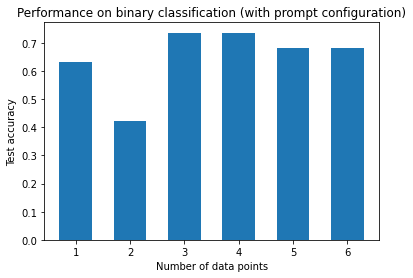

In [71]:
plt.bar(range(1, 7), acc_prompt, width=0.6)
plt.xlabel('Number of data points')
plt.ylabel('Test accuracy')
plt.title('Performance on binary classification (with prompt configuration)')
plt.show()

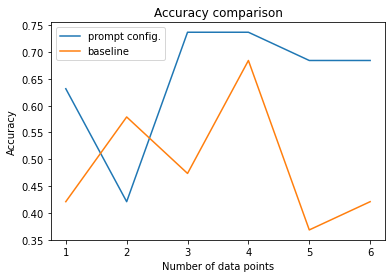

In [72]:
plt.plot(range(1, 7), acc_prompt, label='prompt config.')
plt.plot(range(1, 7), acc, label='baseline')
plt.legend()
plt.title('Accuracy comparison')
plt.xlabel('Number of data points')
plt.ylabel('Accuracy')
plt.show()

### Log data

In [73]:
td_mean_prompt = []
for file in log_names:
    td_temp = []
    file += '_prompt'
    for td in total_duration[file]:
        if 'm' in td:
            minute, second = td[:-1].split('m')
            td_temp.append(int(minute) * 60 + float(second))
        else:
            try:
                td_temp.append(float(td[:-1]))
            except:
                print(file)
    td_mean_prompt.append((sum(td_temp) - max(td_temp) - min(td_temp)) / 17)
td_mean_prompt

[57.49653938058822,
 74.02830853794119,
 68.71617574594117,
 95.4317422584706,
 118.24472781347059,
 115.09155956711764]

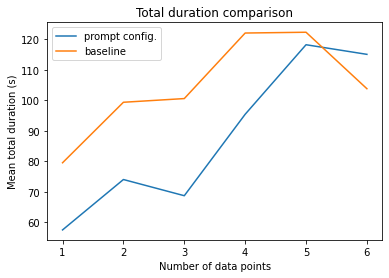

In [74]:
plt.plot(range(1, 7), td_mean_prompt, label='prompt config.')
plt.plot(range(1, 7), td_mean, label='baseline')
plt.legend()
plt.title('Total duration comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean total duration (s)')
plt.show()

In [75]:
ld_mean_prompt = []
for file in log_names:
    file += '_prompt'
    ld_temp = []
    for ld in load_duration[file]:
        ld_temp.append(float(ld[:-2]))
    ld_mean_prompt.append((sum(ld_temp) - max(ld_temp) - min(ld_temp)) / 17)
ld_mean_prompt

[62.93611517647058,
 53.62451905882354,
 55.21050552941176,
 65.11058217647056,
 55.239954,
 50.70490805882353]

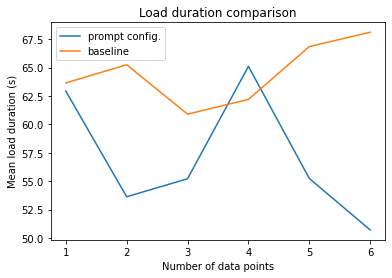

In [86]:
plt.plot(range(1, 7), ld_mean_prompt, label='prompt config.')
plt.plot(range(1, 7), ld_mean, label='baseline')
plt.legend()
plt.title('Load duration comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean load duration (s)')
plt.show()

In [76]:
pec_mean_prompt = []
for file in log_names:
    file += '_prompt'
    pec_temp = []
    for pec in prompt_eval_count[file]:
        pec_temp.append(float(pec[:4]))
    pec_mean_prompt.append((sum(pec_temp) - max(pec_temp) - min(pec_temp)) / 17)
pec_mean_prompt

[1509.764705882353,
 1560.2941176470588,
 1595.6470588235295,
 1636.1176470588234,
 1666.3529411764705,
 1701.764705882353]

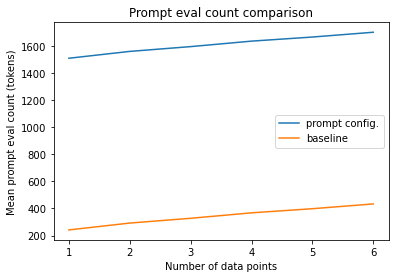

In [87]:
plt.plot(range(1, 7), pec_mean_prompt, label='prompt config.')
plt.plot(range(1, 7), pec_mean, label='baseline')
plt.legend()
plt.title('Prompt eval count comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean prompt eval count (tokens)')
plt.show()

In [79]:
ped_mean_prompt = []
for file in log_names:
    file += '_prompt'
    ped_temp = []
    for ped in prompt_eval_duration[file]:
        if 'm' in ped:
            minute, second = ped[:-1].split('m')
            ped_temp.append(int(minute) * 60 + float(second))
        else:
            _, ped = ped[:-1].split(':')
            ped_temp.append(float(ped))
    ped_mean_prompt.append((sum(ped_temp) - max(ped_temp) - min(ped_temp)) / 17)
ped_mean_prompt

[13.601470588235294,
 17.999235294117646,
 21.241529411764706,
 40.672823529411765,
 54.62476470588235,
 58.09158823529412]

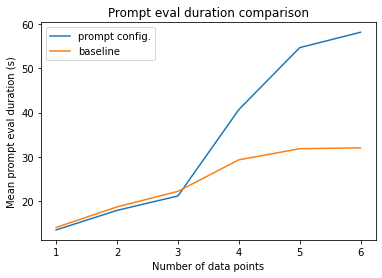

In [88]:
plt.plot(range(1, 7), ped_mean_prompt, label='prompt config.')
plt.plot(range(1, 7), ped_mean, label='baseline')
plt.legend()
plt.title('Prompt eval duration comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean prompt eval duration (s)')
plt.show()

In [89]:
per_mean_prompt = []
for file in log_names:
    file += '_prompt'
    per_temp = []
    for per in prompt_eval_rate[file]:
        per_temp.append(float(per[:5]))
    per_mean_prompt.append((sum(per_temp) - max(per_temp) - min(per_temp)) / 17)
per_mean_prompt

[11.218235294117646,
 87.02882352941177,
 75.5529411764706,
 48.22647058823529,
 41.72176470588235,
 41.45176470588236]

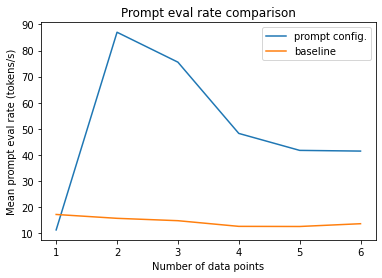

In [90]:
plt.plot(range(1, 7), per_mean_prompt, label='prompt config.')
plt.plot(range(1, 7), per_mean, label='baseline')
plt.legend()
plt.title('Prompt eval rate comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean prompt eval rate (tokens/s)')
plt.show()

In [84]:
ec_mean_prompt = []
for file in log_names:
    file += '_prompt'
    ec_temp = []
    for ec in eval_count[file]:
        ec_temp.append(float(ec[:3]))
    ec_mean_prompt.append((sum(ec_temp) - max(ec_temp) - min(ec_temp)) / 17)
ec_mean_prompt

[185.0,
 239.47058823529412,
 225.23529411764707,
 199.0,
 242.11764705882354,
 230.41176470588235]

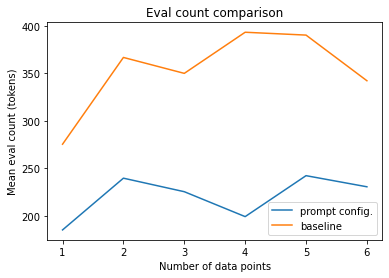

In [91]:
plt.plot(range(1, 7), ec_mean_prompt, label='prompt config.')
plt.plot(range(1, 7), ec_mean, label='baseline')
plt.legend()
plt.title('Eval count comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean eval count (tokens)')
plt.show()

In [85]:
ed_mean_prompt = []
for file in log_names:
    file += '_prompt'
    ed_temp = []
    for ed in eval_duration[file]:
        if 'm' in ed:
            minute, second = ed[:-1].split('m')
            ed_temp.append(int(minute) * 60 + float(second))
        else:
            ed_temp.append(float(ed[:-1]))
    ed_mean_prompt.append((sum(ed_temp) - max(ed_temp) - min(ed_temp)) / 17)
ed_mean_prompt

[42.154058823529404,
 50.620823529411766,
 47.30823529411766,
 48.870823529411766,
 61.033352941176474,
 52.20335294117647]

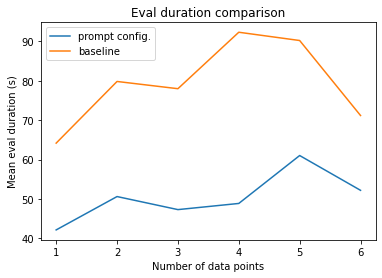

In [92]:
plt.plot(range(1, 7), ed_mean_prompt, label='prompt config.')
plt.plot(range(1, 7), ed_mean, label='baseline')
plt.legend()
plt.title('Eval duration comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean eval duration (s)')
plt.show()

In [93]:
er_mean_prompt = [x / y for x, y in zip(ec_mean_prompt, ed_mean_prompt)]
er_mean_prompt

[4.388663990209582,
 4.730673496375591,
 4.761016611956629,
 4.071959210596001,
 3.966972735254687,
 4.413734975328382]

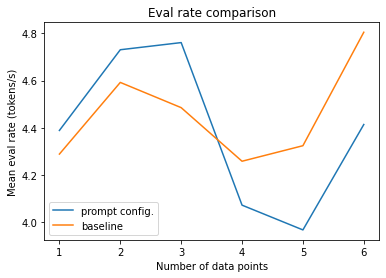

In [104]:
plt.plot(range(1, 7), er_mean_prompt, label='prompt config.')
plt.plot(range(1, 7), er_mean, label='baseline')
plt.legend()
plt.title('Eval rate comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean eval rate (tokens/s)')
plt.show()

## Data augmentation 1

In [118]:
# Hand calculation
acc_enrich = [7/19, 8/19, 10/19]
td_enrich = [141.8178, 215.7921, 364.1271]
ped_enrich = [83.3333, 120.3213, 270.4512]

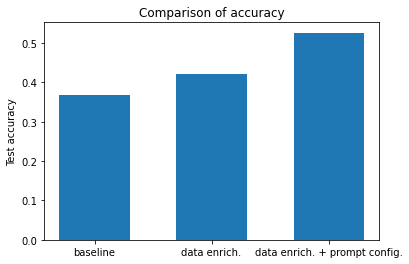

In [119]:
x_ticks = ['baseline', 'data enrich.', 'data enrich. + prompt config.']
plt.bar(range(1, 4), acc_enrich, width=0.6)
plt.ylabel('Test accuracy')
plt.xticks(range(1, 4), x_ticks)
plt.title('Comparison of accuracy')
plt.show()

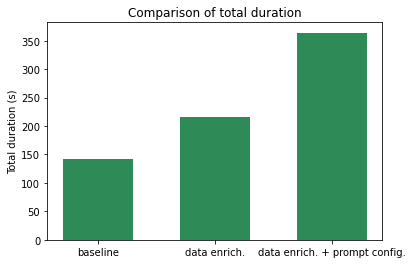

In [120]:
plt.bar(range(1, 4), td_enrich, width=0.6, color='seagreen')
plt.ylabel('Total duration (s)')
plt.xticks(range(1, 4), x_ticks)
plt.title('Comparison of total duration')
plt.show()

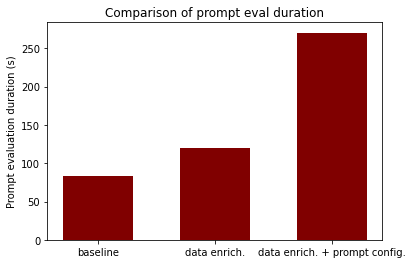

In [124]:
plt.bar(range(1, 4), ped_enrich, width=0.6, color='maroon')
plt.ylabel('Prompt evaluation duration (s)')
plt.xticks(range(1, 4), x_ticks)
plt.title('Comparison of prompt eval duration')
plt.show()

## Data augmentation 2

In [54]:
file_names = ['freq_1_responses_prompt', 'freq_3_responses_prompt', 'freq_4_responses_prompt', 'freq_6_responses_prompt']
log_names = ['freq_1_logs_prompt', 'freq_3_logs_prompt', 'freq_4_logs_prompt', 'freq_6_logs_prompt']

### Accuracy

In [55]:
directory_path = 'llama_outputs_4'

pred = {}
total_duration = {}
load_duration = {}
prompt_eval_count = {}
prompt_eval_duration = {}
prompt_eval_rate = {}
eval_count = {}
eval_duration = {}
eval_rate = {}

for filename in os.listdir(directory_path):
    if 'responses' in filename:
        segment = 0
        file_path = os.path.join(directory_path, filename)
        results = []
        with open(file_path, 'r') as file:
            for line in file:
                if line[:6] == 'ANSWER':
                    results.append(line[8:len(line) - 1])
                elif line[:8] == '**ANSWER':
                    results.append(line[10:len(line) - 3])
                elif line[:4] == '----':
                    segment += 1
                    if segment > len(results):
                        results.append('')
        pred[filename[:-4]] = results
    if 'logs' in filename:
        file_path = os.path.join(directory_path, filename)
        idx = 0
        td = []
        ld = []
        pec = []
        ped = []
        per = []
        ec = []
        ed = []
        er = []
        with open(file_path, 'r', encoding="utf-8") as file:
            for line in file:
                idx += 1
                if idx % 10 == 2:
                    line = line[-18:].strip()
                    td.append(line)
                elif idx % 10 == 3:
                    line = line[-17:].strip()
                    ld.append(line)
                elif idx % 10 == 4:
                    line = line[-15:].strip()
                    pec.append(line)
                elif idx % 10 == 5:
                    line = line[-10:].strip()
                    ped.append(line)
                elif idx % 10 == 6:
                    line = line[-15:].strip()
                    per.append(line)
                elif idx % 10 == 7:
                    line = line[-15:].strip()
                    ec.append(line)
                elif idx % 10 == 8:
                    line = line[-10:].strip()
                    ed.append(line)
                elif idx % 10 == 9:
                    line = line[-15:].strip()
                    er.append(line)
        total_duration[filename[:-4]] = td
        load_duration[filename[:-4]] = ld
        prompt_eval_count[filename[:-4]] = pec
        prompt_eval_duration[filename[:-4]] = ped
        prompt_eval_rate[filename[:-4]] = per
        eval_count[filename[:-4]] = ec
        eval_duration[filename[:-4]] = ed
        eval_rate[filename[:-4]] = er

In [56]:
pred['freq_1_responses_prompt'][9] = 'SITTING'
pred['freq_1_responses_prompt']

['SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING']

In [57]:
pred['freq_3_responses_prompt'][7] = 'WALKING'
pred['freq_3_responses_prompt'][13] = 'SITTING'
pred['freq_3_responses_prompt']

['SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING']

In [58]:
pred['freq_4_responses_prompt'][0] = 'SITTING'
pred['freq_4_responses_prompt'][12] = 'SITTING'
pred['freq_4_responses_prompt'][15] = 'WALKING'
pred['freq_4_responses_prompt']

['SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING']

In [59]:
pred['freq_6_responses_prompt'][3] = 'WALKING'
pred['freq_6_responses_prompt'][4] = 'SITTING'
pred['freq_6_responses_prompt'][14] = 'WALKING'
pred['freq_6_responses_prompt']

['SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'SITTING',
 'WALKING',
 'WALKING',
 'SITTING',
 'WALKING',
 'SITTING']

In [60]:
acc_freq = []
for file in file_names:
    temp = 0
    for i in range(19):
        if i <= 9 and pred[file][i] == 'SITTING':
            temp += 1
        if i > 9 and pred[file][i] == 'WALKING':
            temp += 1
    acc_freq.append(temp/19)
acc_freq

[0.5789473684210527,
 0.42105263157894735,
 0.5789473684210527,
 0.7894736842105263]

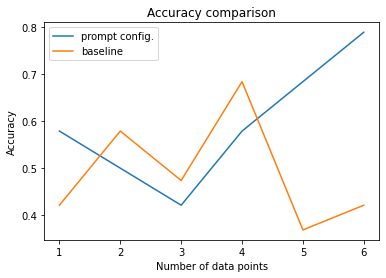

In [61]:
plt.plot([1, 3, 4, 6], acc_freq, label='prompt config.')
plt.plot(range(1, 7), acc, label='baseline')
plt.legend()
plt.title('Accuracy comparison')
plt.xlabel('Number of data points')
plt.ylabel('Accuracy')
plt.show()

### Log data

In [62]:
td_mean_freq = []
for file in log_names:
    td_temp = []
    for td in total_duration[file]:
        if 'm' in td:
            minute, second = td[:-1].split('m')
            td_temp.append(int(minute) * 60 + float(second))
        else:
            try:
                td_temp.append(float(td[:-1]))
            except:
                print(file)
    td_mean_freq.append((sum(td_temp) - max(td_temp) - min(td_temp)) / 17)
td_mean_freq

freq_4_logs_prompt
freq_4_logs_prompt
freq_4_logs_prompt
freq_4_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt


[81.84301875841176, 113.66711179182353, 135.64037678035297, 172.23161885888234]

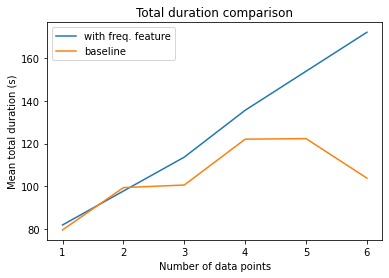

In [63]:
plt.plot([1, 3, 4, 6], td_mean_freq, label='with freq. feature')
plt.plot(range(1, 7), td_mean, label='baseline')
plt.legend()
plt.title('Total duration comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean total duration (s)')
plt.show()

In [66]:
ld_mean_freq = []
for file in log_names:
    ld_temp = []
    for ld in load_duration[file]:
        try:
            ld_temp.append(float(ld[:-2]))
        except:
            print(file)
    ld_mean_freq.append((sum(ld_temp) - max(ld_temp) - min(ld_temp)) / 17)
ld_mean_freq

freq_3_logs_prompt
freq_4_logs_prompt
freq_4_logs_prompt
freq_4_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt


[48.49305770588234, 43.722257823529404, 41.27191188235294, 38.62099864705882]

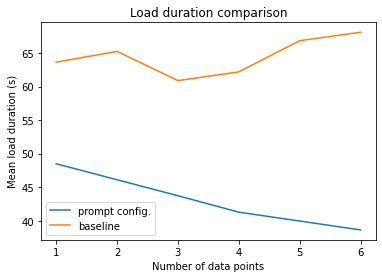

In [68]:
plt.plot([1, 3, 4, 6], ld_mean_freq, label='prompt config.')
plt.plot(range(1, 7), ld_mean, label='baseline')
plt.legend()
plt.title('Load duration comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean load duration (s)')
plt.show()

In [71]:
pec_mean_freq = []
for file in log_names:
    pec_temp = []
    for pec in prompt_eval_count[file]:
        try:
            pec_temp.append(float(pec[:4]))
        except:
            print(file)
    pec_mean_freq.append((sum(pec_temp) - max(pec_temp) - min(pec_temp)) / 17)
pec_mean_freq

freq_4_logs_prompt
freq_4_logs_prompt
freq_4_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt


[1644.5882352941176, 1730.235294117647, 1354.1764705882354, 1296.3529411764705]

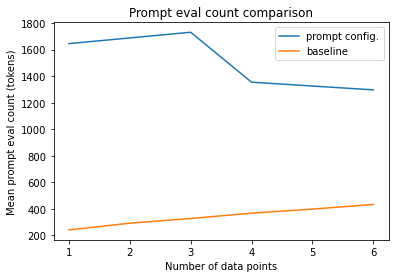

In [72]:
plt.plot([1, 3, 4, 6], pec_mean_freq, label='prompt config.')
plt.plot(range(1, 7), pec_mean, label='baseline')
plt.legend()
plt.title('Prompt eval count comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean prompt eval count (tokens)')
plt.show()

In [74]:
ped_mean_freq = []
for file in log_names:
    ped_temp = []
    for ped in prompt_eval_duration[file]:
        try:
            if 'm' in ped:
                minute, second = ped[:-1].split('m')
                ped_temp.append(int(minute) * 60 + float(second))
            else:
                _, ped = ped[:-1].split(':')
                ped_temp.append(float(ped))
        except:
            print(file)
    ped_mean_freq.append((sum(ped_temp) - max(ped_temp) - min(ped_temp)) / 17)
ped_mean_freq

freq_4_logs_prompt
freq_4_logs_prompt
freq_4_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt


[27.43370588235294, 61.99717647058822, 90.50658823529412, 120.12752941176467]

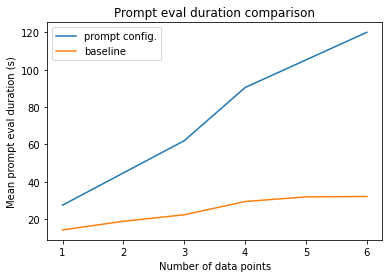

In [75]:
plt.plot([1, 3, 4, 6], ped_mean_freq, label='prompt config.')
plt.plot(range(1, 7), ped_mean, label='baseline')
plt.legend()
plt.title('Prompt eval duration comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean prompt eval duration (s)')
plt.show()

In [77]:
per_mean_freq = []
for file in log_names:
    per_temp = []
    for per in prompt_eval_rate[file]:
        try:
            per_temp.append(float(per[:5]))
        except:
            print(file)
    per_mean_freq.append((sum(per_temp) - max(per_temp) - min(per_temp)) / 17)
per_mean_freq

[60.17294117647059, 39.02588235294119, 229.17647058823533, 23.288823529411758]

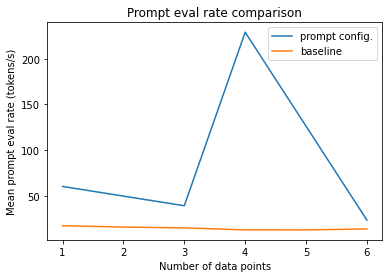

In [78]:
plt.plot([1, 3, 4, 6], per_mean_freq, label='prompt config.')
plt.plot(range(1, 7), per_mean, label='baseline')
plt.legend()
plt.title('Prompt eval rate comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean prompt eval rate (tokens/s)')
plt.show()

In [79]:
ec_mean_freq = []
for file in log_names:
    ec_temp = []
    for ec in eval_count[file]:
        try:
            ec_temp.append(float(ec[:3]))
        except:
            print(file)
    ec_mean_freq.append((sum(ec_temp) - max(ec_temp) - min(ec_temp)) / 17)
ec_mean_freq

freq_4_logs_prompt
freq_4_logs_prompt
freq_4_logs_prompt


[231.35294117647058, 223.1764705882353, 190.7058823529412, 239.41176470588235]

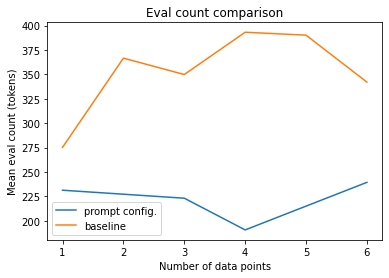

In [80]:
plt.plot([1, 3, 4, 6], ec_mean_freq, label='prompt config.')
plt.plot(range(1, 7), ec_mean, label='baseline')
plt.legend()
plt.title('Eval count comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean eval count (tokens)')
plt.show()

In [81]:
ed_mean_freq = []
for file in log_names:
    ed_temp = []
    for ed in eval_duration[file]:
        try:
            if 'm' in ed:
                minute, second = ed[:-1].split('m')
                ed_temp.append(int(minute) * 60 + float(second))
            else:
                ed_temp.append(float(ed[:-1]))
        except:
            print(file)
    ed_mean_freq.append((sum(ed_temp) - max(ed_temp) - min(ed_temp)) / 17)
ed_mean_freq

freq_4_logs_prompt
freq_4_logs_prompt
freq_4_logs_prompt
freq_6_logs_prompt
freq_6_logs_prompt


[50.59441176470589, 49.955588235294115, 44.65170588235293, 73.07994117647058]

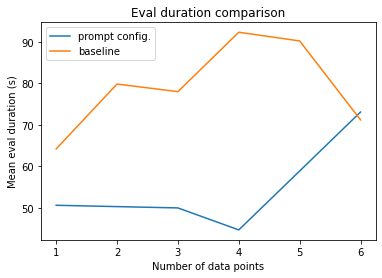

In [82]:
plt.plot([1, 3, 4, 6], ed_mean_freq, label='prompt config.')
plt.plot(range(1, 7), ed_mean, label='baseline')
plt.legend()
plt.title('Eval duration comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean eval duration (s)')
plt.show()

In [83]:
er_mean_freq = [x / y for x, y in zip(ec_mean_freq, ed_mean_freq)]
er_mean_freq

[4.572697519488899, 4.467497600810132, 4.27096520915478, 3.276025689836835]

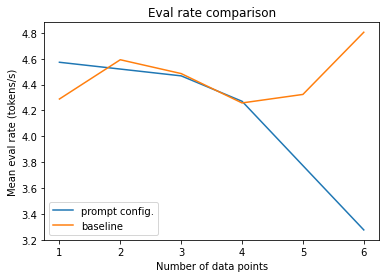

In [84]:
plt.plot([1, 3, 4, 6], er_mean_freq, label='prompt config.')
plt.plot(range(1, 7), er_mean, label='baseline')
plt.legend()
plt.title('Eval rate comparison')
plt.xlabel('Number of data points')
plt.ylabel('Mean eval rate (tokens/s)')
plt.show()